<a href="https://colab.research.google.com/github/zharfanw/zhongshan_dsp_python/blob/main/11_Filter_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1>Filter Introduction</h1></center>



# 1. Simple Filters


*   Filter is essentially a system that processes a signal in a specific manner, primarily by enhancing desired components or suppressing unwanted ones.
*   LSI System system



## Simple FIR Highpass


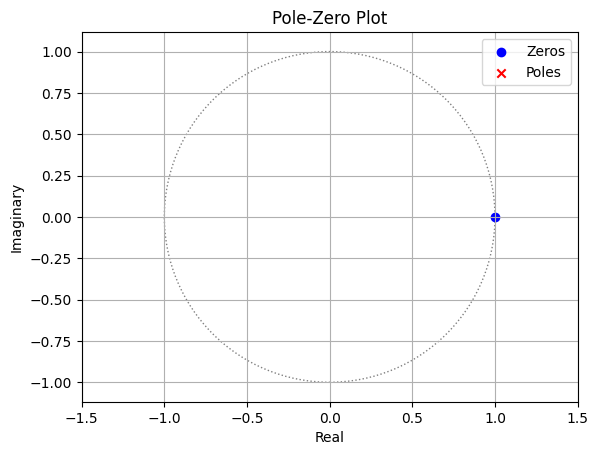

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# Define the filter coefficients
b = np.array([0.5, -0.5])  # Numerator coefficients
a = np.array([1])          # Denominator coefficients

# Compute the zeros and poles
zeros = np.roots(b)
poles = np.roots(a)

# Set up the plot
fig, ax = plt.subplots()
ax.set_title('Pole-Zero Plot')
ax.set_xlabel('Real')
ax.set_ylabel('Imaginary')

# Plot the unit circle
unit_circle = Circle((0,0), radius=1, fill=False, color='gray', ls='dotted')
ax.add_artist(unit_circle)

# Plot zeros and poles
ax.scatter(np.real(zeros), np.imag(zeros), color='blue', marker='o', label='Zeros')
ax.scatter(np.real(poles), np.imag(poles), color='red', marker='x', label='Poles')

# Set limits
# ax.spines['left'].set_position('zero')
# ax.spines['bottom'].set_position('zero')
# ax.spines['right'].set_color('none')
# ax.spines['top'].set_color('none')
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)

# Set grid and aspect
ax.grid(True)
ax.set_aspect('equal', adjustable='datalim')

# Add legend
ax.legend()

# Show plot
plt.show()


## Simple IIR Lowpass


Change with numerous of poles.

In [ ]:
# Filter coefficients for the new IIR filter
b_coeffs_ar = [1]  # Numerator coefficients [1]
a_coeffs_ar = [1, -0.8]  # Denominator coefficients [1, -0.8]

# # Generate impulse response for the AR(1) IIR filter
# t_ar, h_ar = impulse((b_coeffs_ar, a_coeffs_ar))

# # Plot the impulse response
# plt.figure()
# plt.stem(t_ar, h_ar, basefmt=" ", use_line_collection=True)
# plt.title('Impulse Response of AR(1) IIR Filter')
# plt.xlabel('Sample')
# plt.ylabel('Amplitude')
# plt.grid(True)
# plt.show()

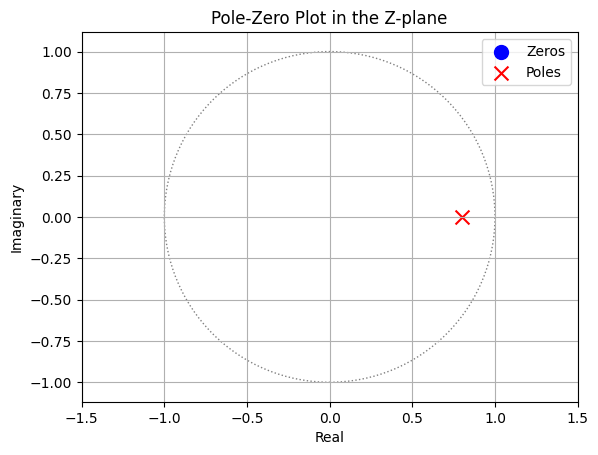

In [ ]:
from scipy.signal import tf2zpk

# Compute the zeros, poles, and gain of the filter
zeros_ar, poles_ar, gain_ar = tf2zpk(b_coeffs_ar, a_coeffs_ar)

# Set up the plot for the z-plane (zero-pole plot)
fig, ax = plt.subplots()
ax.set_title('Pole-Zero Plot in the Z-plane')
ax.set_xlabel('Real')
ax.set_ylabel('Imaginary')

# Plot the unit circle
unit_circle = Circle((0,0), radius=1, fill=False, color='gray', ls='dotted')
ax.add_artist(unit_circle)

# Plot zeros and poles
ax.scatter(np.real(zeros_ar), np.imag(zeros_ar), color='blue', marker='o', s=100, label='Zeros')
ax.scatter(np.real(poles_ar), np.imag(poles_ar), color='red', marker='x', s=100, label='Poles')

# Set limits and aspect ratio
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)

ax.grid(True)
ax.set_aspect('equal', adjustable='datalim')

# Add legend
ax.legend()

# Show plot
plt.show()


## Simple IIR Bandpass
<br>
$
H(z) = \frac{\color{red}{(1-z^{-1})(1+z^{-1})}}{\color{blue}{(1-re^{j\theta}z^{-1})(1-re^{-j\theta}z^{-1})}}
$
<br>
$
H(z) = \frac{1 - z^{-2}}{1 - 2r\cos(\theta)z^{-1} + r^2z^{-2}}
$

## Simple IIR Bandstop
$
H
$

# Ideal Filters
Ideal Filters are theoretical signal processing elements that perfectly pass or block signals based on frequency. These filters are often used in theoretical analysis to understand system behavior or as a reference when designing real-world filters.

"Ideal" characteristics would be like: no phase distortion, etc


Here's an overview:

### **Types of Ideal Filters**
1. **Low-Pass Filter (LPF)**:
* Allows frequencies below a cutoff frequency $f_c$​ to pass without attenuation.
* Completely attenuates frequencies above $f_c$​.
* Transfer function: $H(f) = \begin{cases} 1 & |f| \leq f_c \\\\ 0 & |f| > f_c \end{cases}
$
​
2. **High-Pass Filter (HPF)**:
* Passes frequencies above a cutoff frequency $f_c$​.
* Attenuates frequencies below $f_c$​.
* Transfer function: $H(f) = \begin{cases} 0 & |f| \leq f_c \\\\ 1 & |f| > f_c \end{cases}
$​

​3. **Band-Pass Filter (BPF)**:
* Passes a specific range of frequencies between $f_1$​ and $f_2$​.
* Attenuates frequencies outside this range.
* Transfer function: $H(f) = \begin{cases} 1 & f_1 \leq |f| \leq f_2 \\\\ 0 & \text{otherwise} \end{cases}$

4. **Band-Stop Filter (BSF)**:
* Blocks a specific range of frequencies between $f_1$ and $f_2$​.
* Passes all other frequencies.
* Transfer function: $H(f) = \begin{cases} 0 & f_1 \leq |f| \leq f_2 \\\\ 1 & \text{otherwise} \end{cases}$



Let say we have Ideal Low Pass Filter
<center>
$H(e^{j\omega}) = \begin{cases} 1, & |\omega| \leq \omega\_c \\\\ 0, & |\omega| > \omega\_c \end{cases}$
</center>
<br>
Then we IDTFT $H(e^{j\omega})$
<br>
$h[n] = \frac{1}{2\pi} \int_{-\pi}^{\pi} H(e^{j\omega})e^{j\omega n} \; d\omega ​
$
<br>
$h[n] = \frac{1}{2\pi} \int_{-\omega_c}^{\omega_c} e^{j\omega n} \; d\omega ​
$
<br>
<center>
$
h[n] = \frac{sin \; \omega_c n}{\pi n}
$
</center>

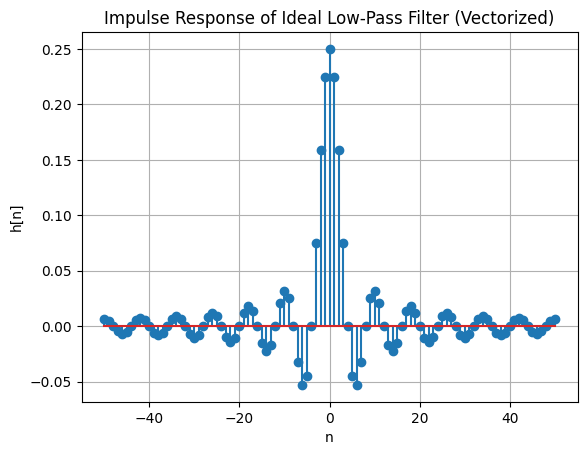

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the cutoff frequency ω_c
omega_c = np.pi / 4

# Define the range of n
n = np.arange(-50, 51)

# Avoid division by zero by temporarily replacing zero with a small value
n_zero = n.copy()
n_zero[n_zero == 0] = 1  # Temporary placeholder to avoid division by zero

# Compute h[n] using vectorized operations
h = np.sin(omega_c * n_zero) / (np.pi * n_zero)

# Correct the value at n = 0
h[n == 0] = omega_c / np.pi

# Plot the impulse response
plt.stem(n, h)
plt.xlabel('n')
plt.ylabel('h[n]')
plt.title('Impulse Response of Ideal Low-Pass Filter (Vectorized)')
plt.grid(True)
plt.show()


### **Limitations in Practice**
1. **Non-Realizability**: Ideal filters are non-causal, meaning their output depends on future input, making them impossible to implement in real-time systems.
2. **Infinite Impulse Response**: The impulse response of an ideal filter is infinitely long, making practical implementation infeasible.
3. **Practical Approximations**: Real filters (like Butterworth, Chebyshev, or elliptic filters) approximate ideal filters but have trade-offs like ripple in passband/stopband or gradual roll-off.

### Practical Filter Specification
 To approximate an ideal filter using a windowed impulse response, the mathematical formulation involves the multiplication of the infinite impulse response of the ideal filter with a finite window function. Here's the step-by-step mathematical derivation:

 ### **1\. Ideal Filter Impulse Response** The impulse response $h_{\text{ideal}}(t)$ of an ideal filter depends on the type of filter. For an ideal **low-pass filter** with cutoff frequency $f_c$​, it is given by:
 $
 h_{\text{ideal}}(t) = \frac{\sin(2 \pi f_c t)}{\pi t}, \quad t \neq 0
 $
 <br>
  with:
  <br>
  $
  h_{\text{ideal}}(0) = 2 f_c
  $
  <br>
  ​This is also known as the sinc function, scaled to the cutoff frequency:
  $
  h_{\text{ideal}}(t) = 2 f_c \, \text{sinc}(2 f_c t)
  $
### **2\. Window Function** Let $w(t)$ be the window function. Examples include:
* **Rectangular Window**:
$
w(t) = \begin{cases} 1, & |t| \leq T/2 \\\\ 0, & |t| > T/2 \end{cases}
$
* **Hann Window**:
$
w(t) = 0.5 \left( 1 - \cos\left(\frac{2 \pi t}{T}\right) \right)
$
* **Hamming Window**:
$
w(t) = 0.54 - 0.46 \cos\left(\frac{2 \pi t}{T}\right)
$

### **3\. Windowed Impulse Response** The finite impulse response $h(t)$ is obtained by multiplying $h_{\text{ideal}}(t)$ with the window function $w(t)$:

$
h(t) = h_{\text{ideal}}(t) \cdot w(t)
$
<br>
For an ideal low-pass filter:
<br>
$
h(t) = \frac{\sin(2 \pi f_c t)}{\pi t} \cdot w(t), \quad t \neq  0
$
<br>
and at $t=0$:
<br>
$
h(0) = 2 f_c \cdot w(0)
$

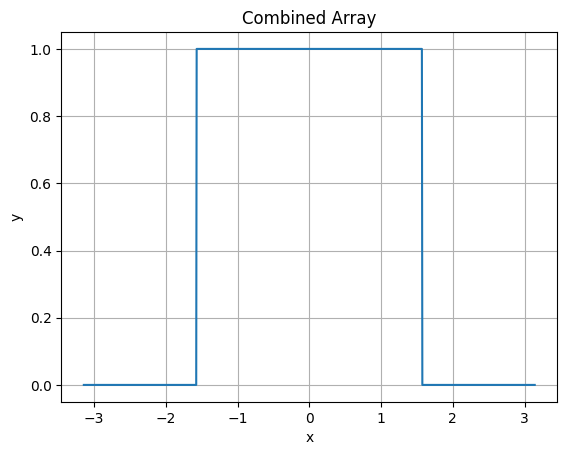

In [ ]:
# prompt: create array 1000 point from -\pi to \pi, then with create array 250 zeros array, 500 ones array, 250 zeros array

import numpy as np

# Create an array of 1000 points from -π to π
x = np.linspace(-np.pi, np.pi, 1000)

# Create the combined array
combined_array = np.concatenate((np.zeros(250), np.ones(500), np.zeros(250)))

plt.plot(x, combined_array)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Combined Array')
plt.grid(True)

<ipython-input-41-9c2f4e7c16dc>:15: RuntimeWarning: divide by zero encountered in log10
  combined_array_db = 20 * np.log10(combined_array)


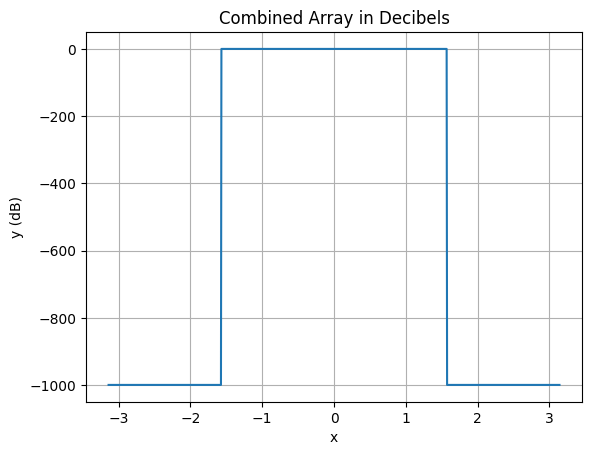

In [ ]:
# prompt: change combined_array to decibels

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from scipy.signal import tf2zpk

# Create an array of 1000 points from -π to π
x = np.linspace(-np.pi, np.pi, 1000)

# Create the combined array
combined_array = np.concatenate((np.zeros(250), np.ones(500), np.zeros(250)))

# Convert the combined array to decibels
combined_array_db = 20 * np.log10(combined_array)

# Replace -inf with a minimum value for plotting purposes
combined_array_db[combined_array_db == -np.inf] = -999

plt.plot(x, combined_array_db)
plt.xlabel('x')
plt.ylabel('y (dB)')  # Change y-axis label to dB
plt.title('Combined Array in Decibels')
plt.grid(True)
plt.show()

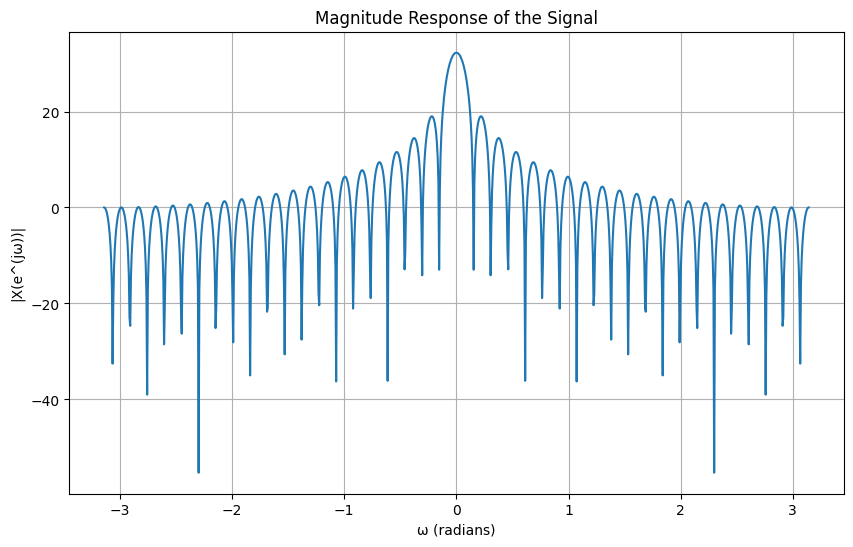

<ipython-input-67-5bb968244a8d>:25: RuntimeWarning: divide by zero encountered in log10
  test_db = 20 * np.log10(np.abs(test))


Text(0, 0.5, '|H(e^(jω))|')

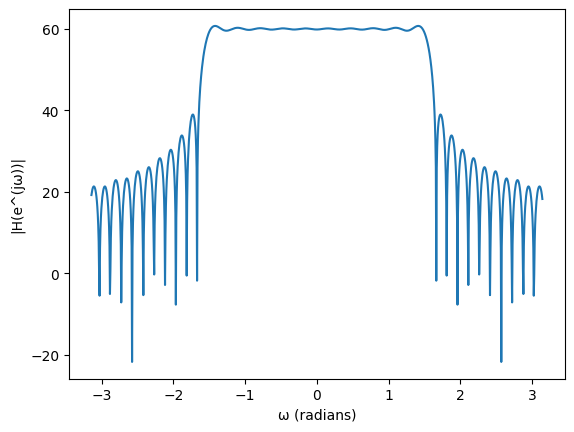

In [ ]:
# prompt: Create 1000 point signal ∣X(ejω)∣\=​sin(2ω​)sin(2Nω​)

import numpy as np
import matplotlib.pyplot as plt

# Define the frequency range (ω) and the number of points (N)
omega = np.linspace(-np.pi, np.pi, 1000)
N = 20  # Example value for N

# Calculate the magnitude of the signal |X(e^(jω))|
X = np.sin(omega*(N+0.5)) / np.sin(omega/2)
X_db = 20 * np.log10(np.abs(X))


# Plot the magnitude response
plt.figure(figsize=(10, 6))
plt.plot(omega, X_db)
plt.xlabel('ω (radians)')
plt.ylabel('|X(e^(jω))|')
plt.title('Magnitude Response of the Signal')
plt.grid(True)
plt.show()

test = np.convolve(combined_array, X)
test_db = 20 * np.log10(np.abs(test))
len(test_db)
plt.figure()
plt.plot(omega,test_db[500:1500])
plt.xlabel('ω (radians)')
plt.ylabel('|H(e^(jω))|')



Show Convolution between square signal with gak tau apaan dah kek gurita

[ini cok](https://www.geeksforgeeks.org/gibbs-phenomenon-rectangular-and-hamming-window-implementation/)



Where gibs comes from ???
bikin simulasi yang berjalan
 jelaskan tentang gibs phenomena

Windows shapes for FIR Filters

Create Window Shape of filters

Windows Approach

design Filter:
1. Create ideal Filter in h(jew)
2. transform in time domain
3. and convolution in window

# Linear-Phase Filters

The magnitude response $|H(e^{j\omega})|$ only tells us how the amplitude of each frequency component is affected by the filter. It does not provide any information about how the phase of these components is altered

This absence of phase information means that even if two filters have identical magnitude responses, they can still behave very differently in terms of how they affect the signal's time-domain characteristics, because they might introduce different amounts of phase shift or distortion.

Linear-phase filters are a category of filters in signal processing that have the characteristic of maintaining the phase linearity of the input signal throughout the frequency spectrum. This property ensures that all frequency components of the input signal are delayed by the same amount of time as they pass through the filter, preserving the waveform shape of the original signal in the output.



> A filter is said to have a linear phase if its phase response is a linear function of frequency. This means the phase shift introduced by the filter at any frequency is proportional to that frequency.
<center>
$\phi(\omega) = -D \omega$,
</center>
It extracted from $H(e^{j\omega}) = e^{-j\color{red}{D\omega}} \hat{H}(\omega)$
<br>
where $D$ is the constant of proportionality and represents the delay. <font color="blue">linear-phase</font>






## Linear-phase FIR Filter
* **Type 1**: Symmetric, with an even number of taps (coefficients). Used for low-pass, high-pass, and band-pass filters.
<show Picture by sequence>
* **Type 2**: Symmetric, with an odd number of taps. Typically used for low-pass or high-pass filters.
<show Picture by sequence>
* **Type 3**: Anti-symmetric, with an odd number of taps. Generally serves as a differentiator or a high-pass filter.
<show Picture by sequence>
* **Type 4**: Anti-symmetric, with an even number of taps. Often used for differentiators or high-pass filters.
<show Picture by sequence>


Text(0.5, 0, 'Type 4 : Anti-Symmetric Even Length')

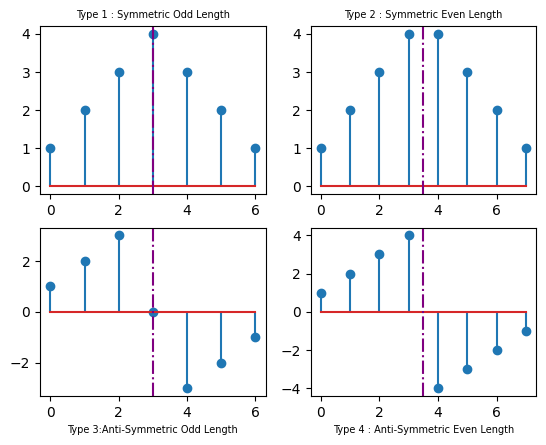

In [ ]:
fig, axs = plt.subplots(2, 2)

t1 = [1,2,3,4,3,2,1];
axs[0,0].stem(t1)
axs[0,0].axvline(3, color ='purple', linestyle="-.")
axs[0,0].set_title('Type 1 : Symmetric Odd Length',fontsize= 7)
t2 = [1,2,3,4,4,3,2,1];
axs[0,1].stem(t2)
axs[0,1].axvline(3.5, color ='purple', linestyle="-.")
axs[0,1].set_title('Type 2 : Symmetric Even Length',fontsize= 7)
t3 = [1,2,3,0,-3,-2,-1];
axs[1,0].stem(t3)
axs[1,0].axvline(3, color ='purple', linestyle="-.")
axs[1,0].set_xlabel('Type 3:Anti-Symmetric Odd Length',fontsize= 7)
t4 = [1,2,3,4,-4,-3,-2,-1];
axs[1,1].stem(t4)
axs[1,1].axvline(3.5, color ='purple', linestyle="-.")
axs[1,1].set_xlabel('Type 4 : Anti-Symmetric Even Length',fontsize= 7)

## Linear-phase FIR : Type 1


*   Length(L) is odd, in Order N = L-1 <font color="green">even</font>
*   Symmetric --> $h[n] = h[N-n],h[N-n]\, is \,unique$
*   $H(e^{j\omega}) = \sum_{n=0}^{N} h[n] e^{-j\omega n}$
<br>
$H(e^{j\omega}) = e^{-j\omega \frac{N}{2}} \left( h \left[ \frac{N}{2}\right] + 2\sum_{n=1}^{\frac{N}{2}} h \left[ \frac{N}{2}-n\right] \cos(\omega n) \right)$

